In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
import pandas as pd
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
"""
Choose the training data set to be trained on.
"""
dataset = 2

if dataset==1:
    # Training Data set with 10e6 data points for gamma = 0.37, delta = 0.3
    X_train = np.array(pd.read_csv("X_train_mac_lots.csv", header=0, index_col=0))
    y_train = pd.read_csv("y_train_mac_lots.csv", header=0, index_col=0)
    X_test = np.array(pd.read_csv("X_test_mac_lots.csv", header=0, index_col=0))
    y_test = pd.read_csv("y_test_mac_lots.csv", header=0, index_col=0)
elif dataset==2:
    # Training Data set with 10e5 data points for gamma = 0.37, delta = 1
    X_train = np.array(pd.read_csv("X_train_delta1.csv", header=0, index_col=0))
    y_train = pd.read_csv("y_train_delta1.csv", header=0, index_col=0)
    X_test = np.array(pd.read_csv("X_test_delta1.csv", header=0, index_col=0))
    y_test = pd.read_csv("y_test_delta1.csv", header=0, index_col=0)

In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = pd.DataFrame(scaler.transform(X_train), columns=['x0','v0','t'])
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=['x0','v0','t'])

In [164]:
# set up and train the network
input_shape = (np.shape(X_train)[1], 1)
#opt = RMSprop()
opt = Adam(learning_rate=0.001, beta_1=0.7)

model = Sequential()
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)]
model.add(layers.Flatten())

"""
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
"""
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(2))
loss='mse'
model.compile(optimizer=opt, loss=loss)
history=model.fit(X_train_scale, y_train, steps_per_epoch=None, epochs=500, validation_split=0.2, batch_size=5096, shuffle=True, callbacks=callbacks, verbose=1)

Epoch 1/500
157/157 [==============================] - 1s 3ms/step - loss: 0.2205 - val_loss: 0.1175
Epoch 2/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0954 - val_loss: 0.0806
Epoch 3/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0768 - val_loss: 0.0739
Epoch 4/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0728 - val_loss: 0.0716
Epoch 5/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0711 - val_loss: 0.0702
Epoch 6/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0701 - val_loss: 0.0697
Epoch 7/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.0689
Epoch 8/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0691 - val_loss: 0.0692
Epoch 9/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0687 - val_loss: 0.0682
Epoch 10/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0684 - val_lo

157/157 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0543
Epoch 82/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0544
Epoch 83/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0550 - val_loss: 0.0565
Epoch 84/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0560
Epoch 85/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0549 - val_loss: 0.0541
Epoch 86/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0546 - val_loss: 0.0551
Epoch 87/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.0537
Epoch 88/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0544 - val_loss: 0.0536
Epoch 89/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0533
Epoch 90/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 

Epoch 161/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.0461
Epoch 162/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0465 - val_loss: 0.0464
Epoch 163/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.0458
Epoch 164/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.0461
Epoch 165/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.0463
Epoch 166/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0463 - val_loss: 0.0457
Epoch 167/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0463 - val_loss: 0.0464
Epoch 168/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.0461
Epoch 169/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0462 - val_loss: 0.0478
Epoch 170/500
157/157 [==============================] - 0s 3ms/step - lo

157/157 [==============================] - 0s 3ms/step - loss: 0.0432 - val_loss: 0.0427
Epoch 241/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.0425
Epoch 242/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0432 - val_loss: 0.0428
Epoch 243/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0432 - val_loss: 0.0426
Epoch 244/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0433 - val_loss: 0.0427
Epoch 245/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0432 - val_loss: 0.0433
Epoch 246/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.0453
Epoch 247/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0430 - val_loss: 0.0441
Epoch 248/500
157/157 [==============================] - 0s 3ms/step - loss: 0.0432 - val_loss: 0.0425
Epoch 249/500
157/157 [==============================] - 0s 2ms/step - loss: 0.0431 - v

In [165]:
# evaluate the fitting validation and training losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

## Make Prdictions on the Test Dataset
y_pred = pd.DataFrame(model.predict(X_test_scale), columns=['xt','vt'])



In [166]:
pred_norm = np.linalg.norm(y_pred[['xt','vt']].values,axis=1)
true_norm = np.linalg.norm(y_test[['xt','vt']].values,axis=1)
hist_data = np.abs(pred_norm-true_norm)/np.abs(true_norm)
hist_data = pd.DataFrame(hist_data, columns=['norm'])
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.00)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1
    trueList = ~((df > (Q3 + 1.5 * IQR)))
    #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

indices = Remove_Outlier_Indices(hist_data)
hist_data = hist_data[indices]

You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


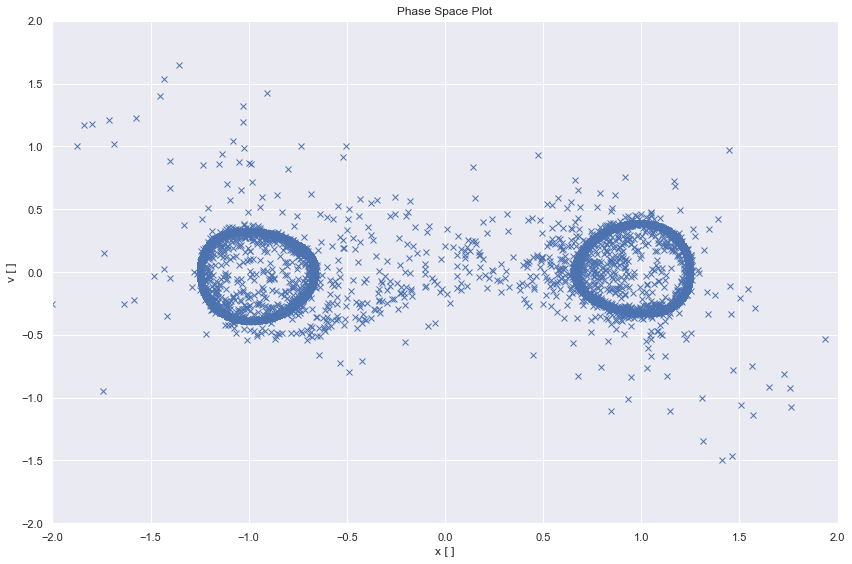

In [167]:
f, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4]))

sns.scatterplot(data = y_test.iloc[:10000,:], x = 'xt', y='vt',ax=axs, marker='x', linewidth = 1)

axs.set(xlim=(-2, 2), ylim=(-2, 2))
axs.set_xlabel('x [ ]')
axs.set_ylabel('v [ ]')
axs.set_title("Phase Space Plot")

f.tight_layout()

f.savefig("data_only_damped.svg", dpi='figure')

You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


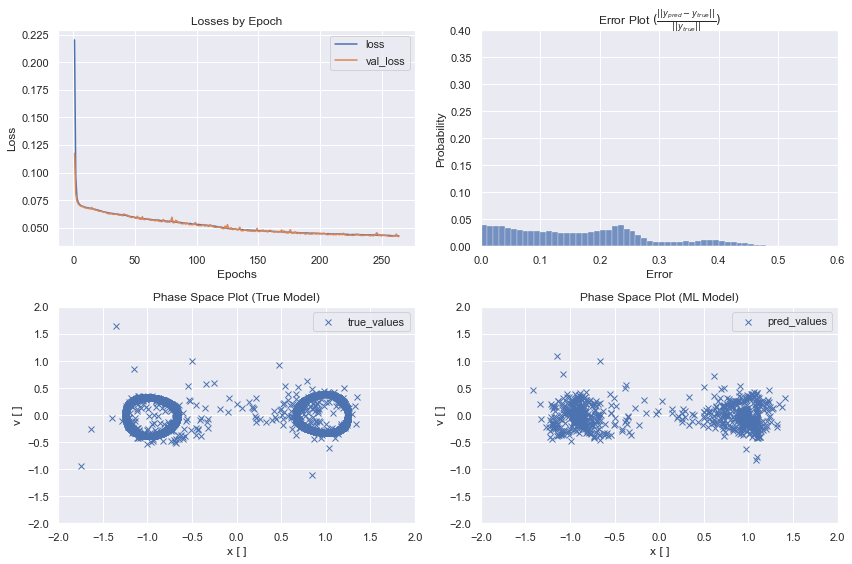

In [168]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))

sns.lineplot(data = history.history, x = epochs, y='loss',ax=axs[0,0], label='loss')
sns.lineplot(data = history.history, x = epochs, y='val_loss',ax=axs[0,0], label='val_loss')

axs[0,0].set_xlabel('Epochs')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title("Losses by Epoch")
axs[0,0].legend()



sns.scatterplot(data = y_test.iloc[:2000,:], x = 'xt', y='vt',ax=axs[1,0],label='true_values', marker='x', linewidth = 1)

axs[1,0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,0].set_xlabel('x [ ]')
axs[1,0].set_ylabel('v [ ]')
axs[1,0].set_title("Phase Space Plot (True Model)")


sns.scatterplot(data = y_pred.iloc[:2000,:], x='xt', y='vt',ax=axs[1,1],label='pred_values',  marker='x', linewidth = 1)

axs[1,1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,1].set_xlabel('x [ ]')
axs[1,1].set_ylabel('v [ ]')
axs[1,1].set_title("Phase Space Plot (ML Model)")


sns.histplot(data=hist_data, x = 'norm', kde=False, stat='probability', binwidth=0.01, ax=axs[0,1])
axs[0,1].set(xlim=(0, 0.6), ylim=(0, 0.4))
axs[0,1].set_xlabel('Error')
axs[0,1].set_ylabel('Probability')
axs[0,1].set_title(r"Error Plot $(\frac{||y_{pred}-y_{true}||}{||y_{true}||})$")



f.tight_layout()

f.savefig("damped_duffing_simple_model.svg", dpi='figure')

In [169]:
class TrueModel():
    def __init__(self, scaler):
        self.alpha=-1
        self.beta=1
        self.delta=1#0.3
        self.gamma=0.37
        self.omega=1.2
        self.scaler = scaler
        
    def inv_transform(self, X):
        return pd.DataFrame(self.scaler.inverse_transform(X), columns=['x0','v0','t'])
       
    def eom(self, u, t):
        x, dx = u[0], u[1]
        ddx= self.gamma * np.cos(self.omega * t) - (self.delta * dx + self.alpha*x + self.beta * x**3)
        return [dx,ddx]
    
    def predict(self, X):
        X = self.inv_transform(X)
        X_res = np.ones((np.shape(X)[0], 2))
        for i in range(0,np.shape(X)[0]):
            t_range = np.linspace(0, X['t'].iloc[i], 500, endpoint=False)
            X_res[i,:] = odeint(self.eom, [X['x0'].iloc[i],X['v0'].iloc[i]], t_range)[-1]
            
        return X_res


In [170]:
true_model = TrueModel(scaler)


In [171]:
import shap

background = X_train_scale.iloc[np.random.choice(X_train_scale.shape[0], 100, replace=False)]

true_explainer = shap.explainers.Permutation(true_model.predict, background)
explainer = shap.explainers.Permutation(model.predict, background)

In [172]:
true_values = true_explainer(X_test_scale.iloc[:100,:])
model_values = explainer(X_test_scale.iloc[:100,:])

Permutation explainer: 101it [34:44, 20.84s/it]                         
Permutation explainer: 101it [00:34,  2.06it/s]                         


In [173]:

print("shap_values =", true_values.values)


print("shap_values =", model_values.values)


shap_values = [[[ 5.95407531e-02 -1.01546871e-02]
  [ 8.23116997e-01 -1.06198170e-02]
  [-2.96395483e-01  3.16923087e-02]]

 [[-7.47411816e-01 -1.51281178e-02]
  [-2.41394080e-01 -4.59670548e-03]
  [ 6.23223524e-03  3.40806914e-01]]

 [[ 8.65281166e-01 -1.16764751e-02]
  [-7.57781055e-05  1.12355674e-03]
  [ 2.79786898e-01 -1.47290008e-01]]

 [[-1.00362447e+00  3.77617860e-02]
  [ 1.15699269e-02 -2.29892623e-03]
  [ 2.31504196e-01 -1.51106698e-01]]

 [[-1.00876912e+00  1.75463097e-02]
  [ 2.82316177e-02 -3.12916088e-03]
  [ 1.55170837e-01 -2.49381250e-01]]

 [[ 8.68654387e-01 -9.20937696e-05]
  [ 1.28350943e-02 -2.23105235e-03]
  [ 2.75600813e-01  1.51731888e-01]]

 [[ 6.67950120e-01 -2.13134268e-02]
  [ 2.11254756e-01 -6.84685850e-03]
  [ 2.80351963e-01 -8.16437936e-02]]

 [[ 8.77368883e-01 -1.65568130e-02]
  [ 5.29169979e-03 -2.64123490e-03]
  [-2.96365329e-01  2.78754819e-02]]

 [[ 9.78307766e-01 -1.38103551e-02]
  [-1.28299288e-01  2.74462345e-05]
  [ 8.79528966e-02 -3.03558929e-01

In [174]:
true_explainer_partition = shap.explainers.Partition(true_model.predict, background)
explainer_partition = shap.explainers.Partition(model.predict, background)

In [175]:
true_values_partition = true_explainer_partition(X_test_scale.iloc[:100,:])
model_values_partition = explainer_partition(X_test_scale.iloc[:100,:])

Partition explainer: 101it [04:44,  2.93s/it]                         
Partition explainer: 101it [00:12,  1.67it/s]                         


In [176]:
np.sum(true_values.values[1])

-0.6614915698653587

In [177]:
true_plotting_data = np.empty((len(true_values.values),6))
plotting_data = np.empty((len(true_values.values),6))

for i in range(len(true_values.values)):
    true_plotting_data[i,:] = true_values_partition.values[i].flatten()
    plotting_data[i,:] = model_values_partition.values[i].flatten()
    
true_plot_data = pd.DataFrame(true_plotting_data, columns = ['x0_xt', 'v0_xt', 't_xt', 'x0_vt', 'v0_vt', 't_vt'])
plot_data = pd.DataFrame(plotting_data, columns = ['x0_xt', 'v0_xt', 't_xt', 'x0_vt', 'v0_vt', 't_vt'])

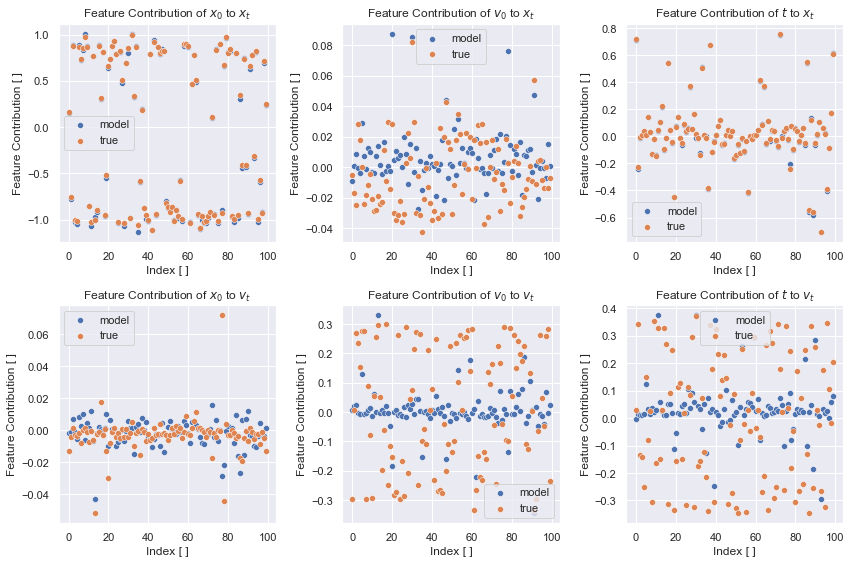

In [178]:
f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4, 4]))



sns.scatterplot(data = plot_data, x = plot_data.index,  y='x0_xt', label = 'model', ax=axs[0,0])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='x0_xt', label='true',ax=axs[0,0])
axs[0,0].set_title(r"Feature Contribution of $x_0$ to $x_t$")
axs[0,0].set_xlabel('Index [ ]')
axs[0,0].set_ylabel('Feature Contribution [ ]')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='v0_xt', label = 'model', ax=axs[0,1])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='v0_xt', label='true',ax=axs[0,1])
axs[0,1].set_title(r"Feature Contribution of $v_0$ to $x_t$")
axs[0,1].set_xlabel('Index [ ]')
axs[0,1].set_ylabel('Feature Contribution [ ]')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='t_xt', label = 'model', ax=axs[0,2])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='t_xt', label='true',ax=axs[0,2])
axs[0,2].set_title(r"Feature Contribution of $t$ to $x_t$")
axs[0,2].set_xlabel('Index [ ]')
axs[0,2].set_ylabel('Feature Contribution [ ]')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='x0_vt', label = 'model', ax=axs[1,0])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='x0_vt', label='true',ax=axs[1,0])
axs[1,0].set_title(r"Feature Contribution of $x_0$ to $v_t$")
axs[1,0].set_xlabel('Index [ ]')
axs[1,0].set_ylabel('Feature Contribution [ ]')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='v0_vt', label = 'model', ax=axs[1,1])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='v0_vt', label='true',ax=axs[1,1])
axs[1,1].set_title(r"Feature Contribution of $v_0$ to $v_t$")
axs[1,1].set_xlabel('Index [ ]')
axs[1,1].set_ylabel('Feature Contribution [ ]')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='t_vt', label = 'model', ax=axs[1,2])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='t_vt', label='true',ax=axs[1,2])
axs[1,2].set_title(r"Feature Contribution of $t$ to $v_t$")
axs[1,2].set_xlabel('Index [ ]')
axs[1,2].set_ylabel('Feature Contribution [ ]')


f.tight_layout()

f.savefig("damped_duffing_simple_shap.svg", dpi='figure')

In [179]:
def shap_aggregation_mean(x, model, scaler=scaler):
    
    x.values
    x.data
    x.base_values
    matrix = np.empty((len(x.values), 3, 3))
    aggregate = np.zeros((3,2))
    pred_values = model.predict(x.data)
    
    for i in range(len(x.values)):
        x_t_attribution = np.abs(x.values[i][:,0])
        v_t_attribution = np.abs(x.values[i][:,1])
        aggregate = aggregate + np.hstack((x_t_attribution.reshape((3,1)), v_t_attribution.reshape((3,1))))
        
    aggregate = aggregate/len(x.values)
    aggregate = pd.DataFrame(aggregate, columns = ['xt', 'vt'], index = ['x0','v0','t'])
    
    return matrix , aggregate

In [180]:
true_matrix, true_aggregate = shap_aggregation_mean(true_values_partition, true_model)

model_matrix, model_aggregate = shap_aggregation_mean(model_values_partition, model)

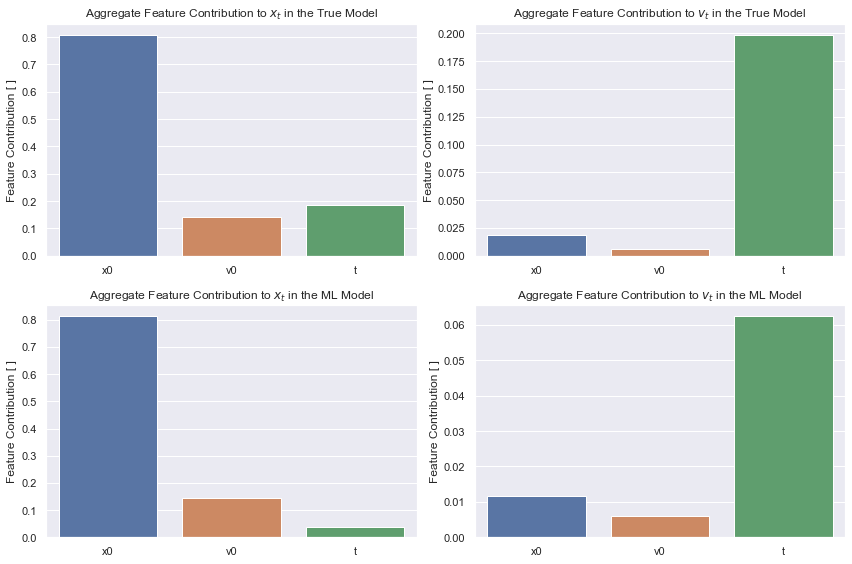

In [181]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))

sns.barplot(data = true_aggregate, x = true_aggregate.index,  y='xt', label = 'xt', ax=axs[0,0])
axs[0,0].set_title(r"Aggregate Feature Contribution to $x_t$ in the True Model")
axs[0,0].set_ylabel('Feature Contribution [ ]')

sns.barplot(data = true_aggregate, x = true_aggregate.index,  y='vt', label = 'vt', ax=axs[0,1])
axs[0,1].set_title(r"Aggregate Feature Contribution to $v_t$ in the True Model")
axs[0,1].set_ylabel('Feature Contribution [ ]')

sns.barplot(data = model_aggregate, x = true_aggregate.index,  y='xt', label = 'xt', ax=axs[1,0])
axs[1,0].set_title(r"Aggregate Feature Contribution to $x_t$ in the ML Model")
axs[1,0].set_ylabel('Feature Contribution [ ]')

sns.barplot(data = model_aggregate, x = model_aggregate.index,  y='vt', label = 'vt', ax=axs[1,1])
axs[1,1].set_title(r"Aggregate Feature Contribution to $v_t$ in the ML Model")
axs[1,1].set_ylabel('Feature Contribution [ ]')

f.tight_layout()

f.savefig("damped_duffing_simple_shap_aggregate.svg", dpi='figure')

In [21]:
import lime
import lime.lime_tabular

In [22]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train_scale), verbose=True, mode='regression')

In [23]:


i = 25
lime_exp_model = lime_explainer.explain_instance(X_test_scale.iloc[i], model.predict, num_features=3)
lime_exp_true = lime_explainer.explain_instance(X_test_scale.iloc[i], true_model.predict, num_features=3)


Intercept 0.3526783855102461
Prediction_local [-0.8518198]
Right: -1.1007575
Intercept 0.3577104070903069
Prediction_local [-0.9036662]
Right: -1.0816567276733369


In [24]:
true_explainer(X_test_scale.iloc[i:i+1,:]).values

Permutation explainer: 2it [00:31, 31.18s/it]               


array([[[-1.06327391e+00, -2.07754915e-02],
        [ 4.22294052e-02, -5.65666115e-04],
        [-1.40514664e-01, -3.60278963e-01]]])

In [25]:
explainer(X_test_scale.iloc[i:i+1,:])

.values =
array([[[-1.08809527, -0.05129361],
        [ 0.06434016,  0.00462273],
        [-0.15303651, -0.32479452]]])

.base_values =
array([[0.07603413, 0.01682247]])

.data =
array([[-1.22781596,  0.63436949,  1.01525974]])

In [26]:
lime_exp_model.show_in_notebook(show_table=True)

In [27]:
lime_exp_true.show_in_notebook(show_table=True)